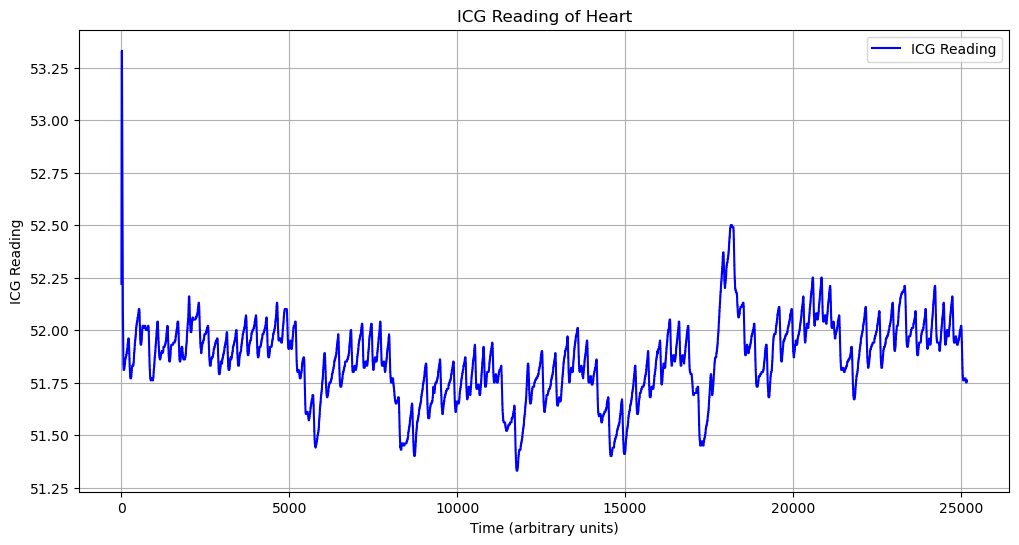

In [11]:
import json
import matplotlib.pyplot as plt

# Load the JSON data
with open('ID001.json', 'r') as file:
    data = json.load(file)

# Extract the raw data
raw_data = data["raw_data"][50:]

# Skip first 400

# Create a plot
plt.figure(figsize=(12, 6))
plt.plot(raw_data, label='ICG Reading', color='b')
plt.title('ICG Reading of Heart')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('ICG Reading')
plt.legend()
plt.grid(True)


# Show the plot
plt.show()

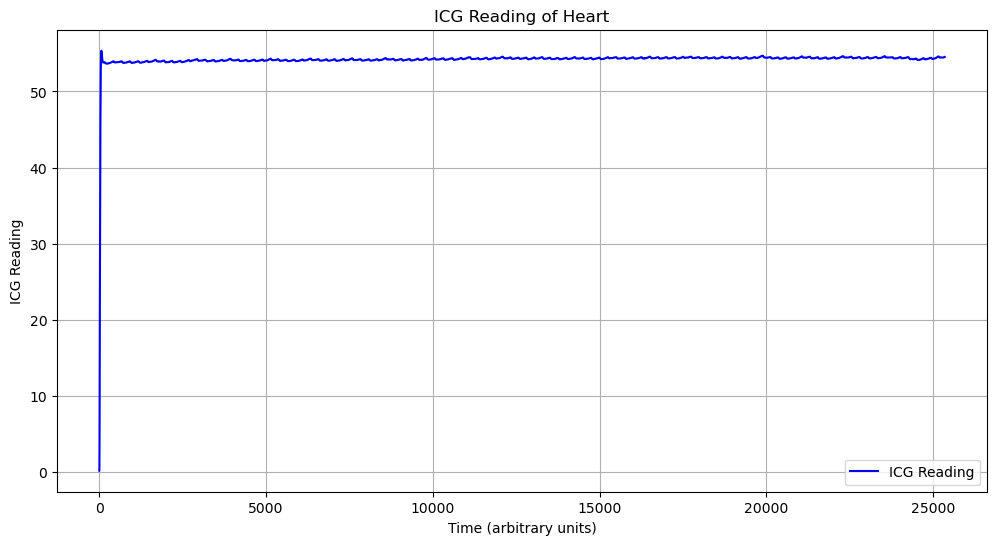

In [4]:
# Load the JSON data
with open('ID002.json', 'r') as file:
    data = json.load(file)

# Extract the raw data
raw_data = data["raw_data"]

# Create a plot
plt.figure(figsize=(12, 6))
plt.plot(raw_data, label='ICG Reading', color='b')
plt.title('ICG Reading of Heart')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('ICG Reading')
plt.legend()
plt.grid(True)


# Show the plot
plt.show()

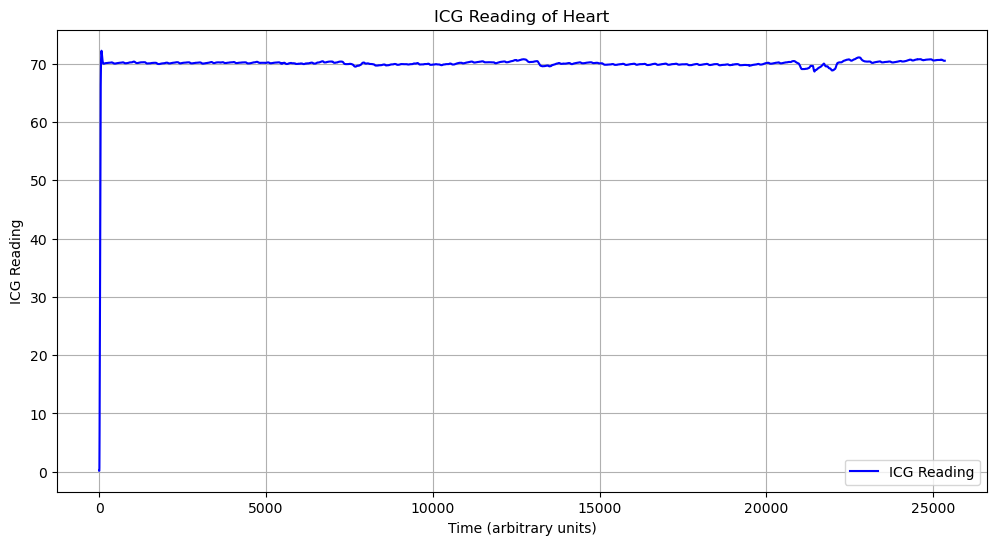

In [5]:
# Load the JSON data
with open('ID003.json', 'r') as file:
    data = json.load(file)

# Extract the raw data
raw_data = data["raw_data"]

# Create a plot
plt.figure(figsize=(12, 6))
plt.plot(raw_data, label='ICG Reading', color='b')
plt.title('ICG Reading of Heart')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('ICG Reading')
plt.legend()
plt.grid(True)


# Show the plot
plt.show()

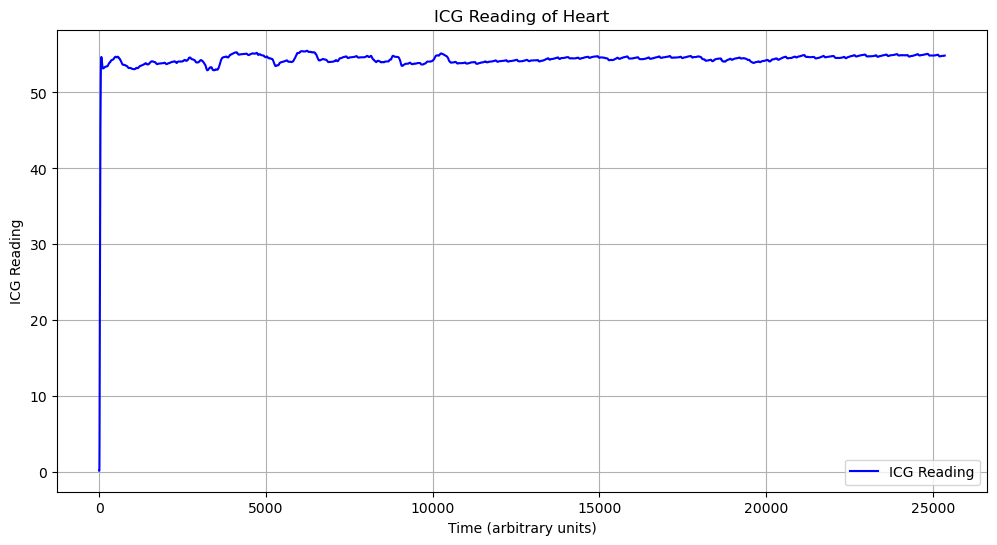

In [6]:
# Load the JSON data
with open('ID004.json', 'r') as file:
    data = json.load(file)

# Extract the raw data
raw_data = data["raw_data"]

# Create a plot
plt.figure(figsize=(12, 6))
plt.plot(raw_data, label='ICG Reading', color='b')
plt.title('ICG Reading of Heart')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('ICG Reading')
plt.legend()
plt.grid(True)


# Show the plot
plt.show()

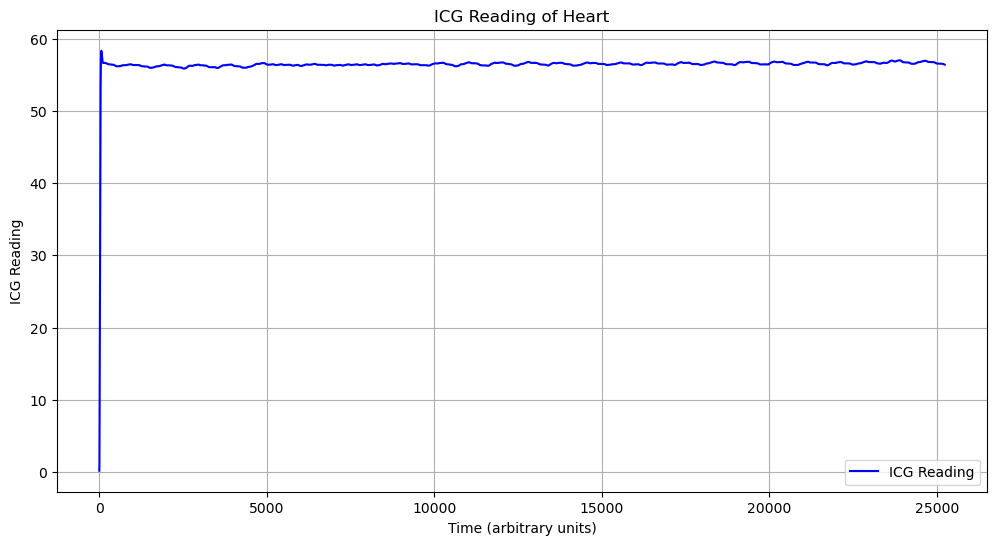

In [7]:
# Load the JSON data
with open('ID005.json', 'r') as file:
    data = json.load(file)

# Extract the raw data
raw_data = data["raw_data"]

# Create a plot
plt.figure(figsize=(12, 6))
plt.plot(raw_data, label='ICG Reading', color='b')
plt.title('ICG Reading of Heart')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('ICG Reading')
plt.legend()
plt.grid(True)


# Show the plot
plt.show()

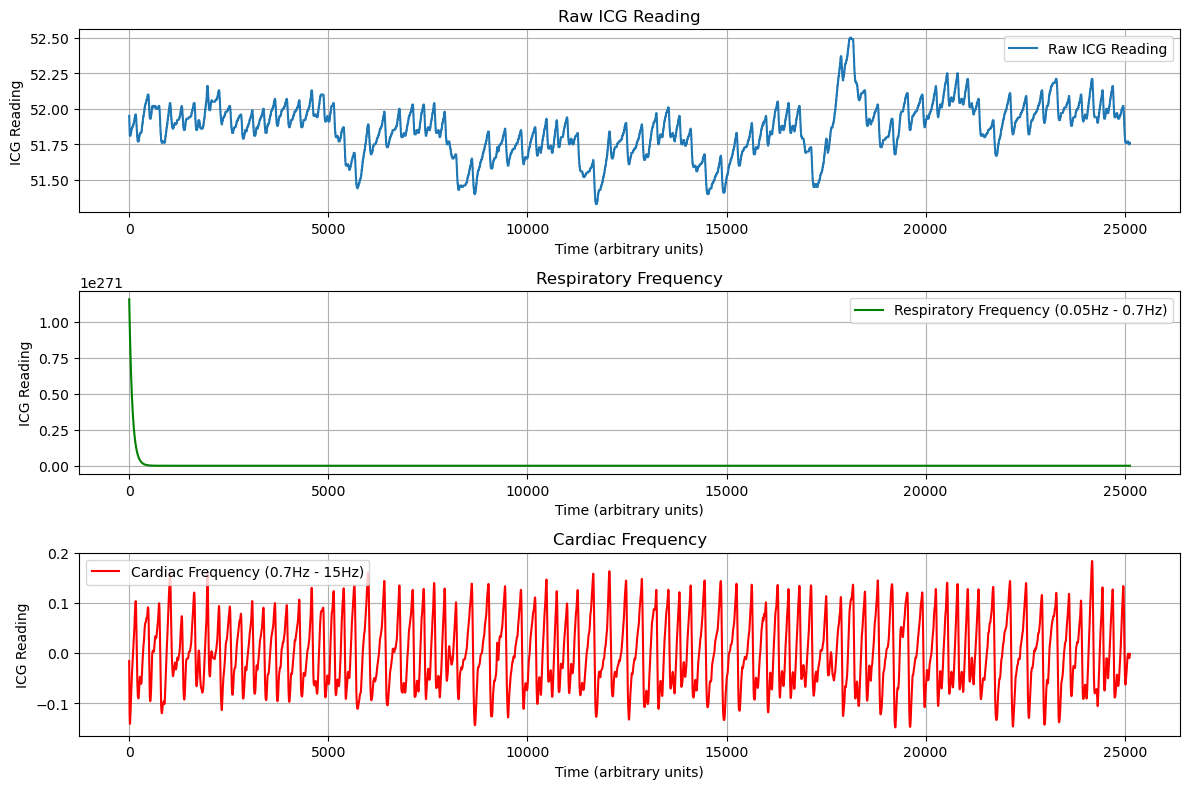

In [18]:
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Load the JSON data
with open('ID001.json', 'r') as file:
    data = json.load(file)

# Extract the raw data
raw_data = np.array(data["raw_data"][100:])

# Define a function to apply a Butterworth bandpass filter
def butter_bandpass(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def bandpass_filter(data, lowcut, highcut, fs, order=4):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# Sampling frequency (assuming the data is sampled at 400 Hz, adjust as necessary)
fs = 400.0

# Apply bandpass filters
respiratory_filtered_data = bandpass_filter(raw_data, 0.05, 0.7, fs)
cardiac_filtered_data = bandpass_filter(raw_data, 0.7, 15.0, fs)

# Plot the results
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(raw_data, label='Raw ICG Reading')
plt.title('Raw ICG Reading')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('ICG Reading')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(respiratory_filtered_data, label='Respiratory Frequency (0.05Hz - 0.7Hz)', color='g')
plt.title('Respiratory Frequency')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('ICG Reading')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(cardiac_filtered_data, label='Cardiac Frequency (0.7Hz - 15Hz)', color='r')
plt.title('Cardiac Frequency')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('ICG Reading')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

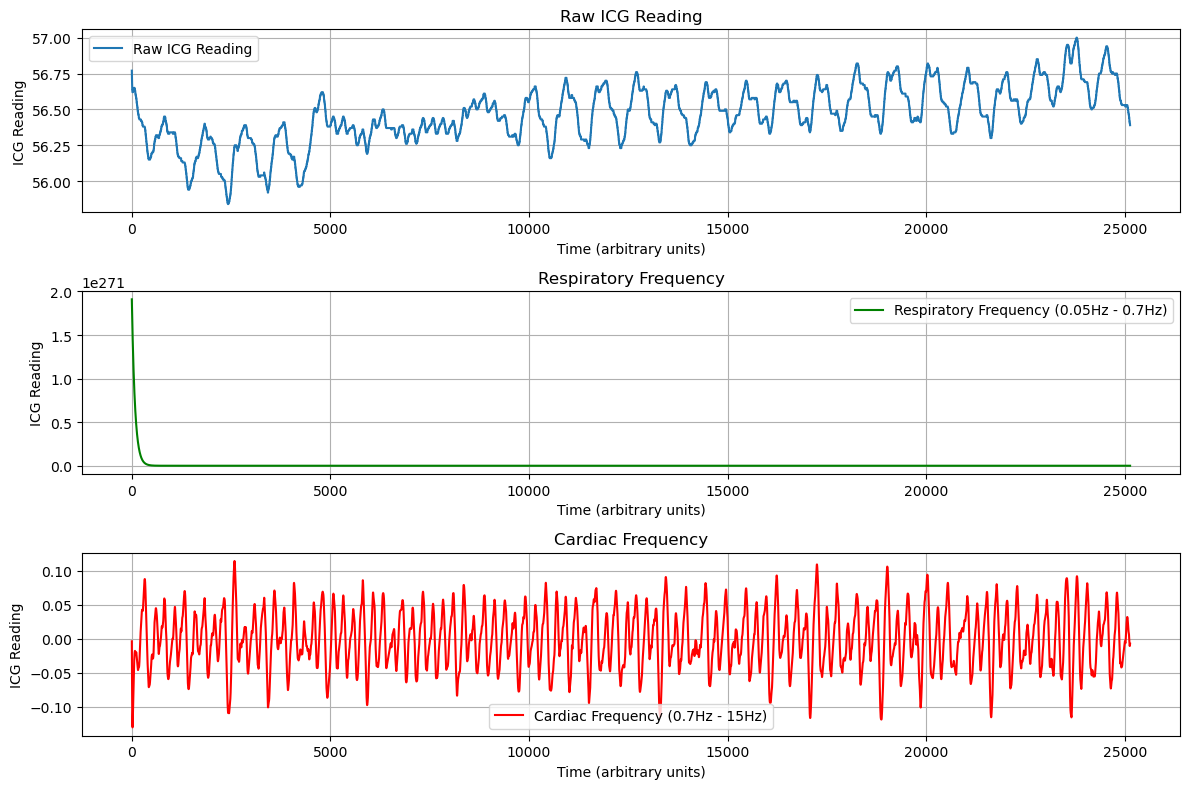

In [23]:
with open('ID005.json', 'r') as file:
    data = json.load(file)

# Extract the raw data
raw_data = np.array(data["raw_data"][100:])

# Define a function to apply a Butterworth bandpass filter
def butter_bandpass(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def bandpass_filter(data, lowcut, highcut, fs, order=4):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# Sampling frequency (assuming the data is sampled at 400 Hz, adjust as necessary)
fs = 400.0

# Apply bandpass filters
respiratory_filtered_data = bandpass_filter(raw_data, 0.05, 0.7, fs)
cardiac_filtered_data = bandpass_filter(raw_data, 0.7, 15.0, fs)

# Plot the results
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(raw_data, label='Raw ICG Reading')
plt.title('Raw ICG Reading')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('ICG Reading')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(respiratory_filtered_data, label='Respiratory Frequency (0.05Hz - 0.7Hz)', color='g')
plt.title('Respiratory Frequency')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('ICG Reading')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(cardiac_filtered_data, label='Cardiac Frequency (0.7Hz - 15Hz)', color='r')
plt.title('Cardiac Frequency')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('ICG Reading')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

ValueError: Unknown mode name 'soft'.

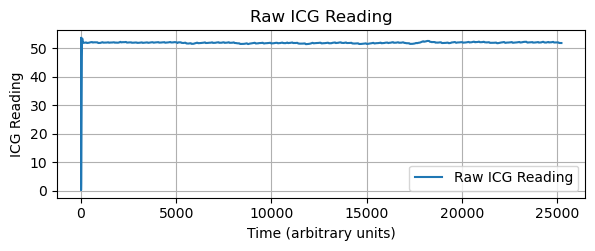

In [25]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pywt

# Load the JSON data
with open('ID001.json', 'r') as file:
    data = json.load(file)

# Extract the raw data
raw_data = np.array(data["raw_data"])

# Define a function for DWT denoising
def dwt_denoise(data, wavelet, level=1):
    coeffs = pywt.wavedec(data, wavelet, mode='soft')
    threshold = np.median(np.abs(coeffs[-level])) / 0.6745 * np.sqrt(2 * np.log(len(data)))
    new_coeffs = list(map(lambda x: pywt.threshold(x, threshold, mode='soft'), coeffs))
    return pywt.waverec(new_coeffs, wavelet)

# List of wavelets to explore
wavelets = ['rbio4.4', 'rbio5.5', 'db6', 'sym3', 'sym4', 'sym6', 'sym8']

# Apply DWT denoising and plot results
plt.figure(figsize=(15, 10))

plt.subplot(4, 2, 1)
plt.plot(raw_data, label='Raw ICG Reading')
plt.title('Raw ICG Reading')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('ICG Reading')
plt.legend()
plt.grid(True)

for i, wavelet in enumerate(wavelets, 2):
    denoised_data = dwt_denoise(raw_data, wavelet)
    plt.subplot(4, 2, i)
    plt.plot(denoised_data, label=f'Denoised with {wavelet}')
    plt.title(f'Denoised with {wavelet}')
    plt.xlabel('Time (arbitrary units)')
    plt.ylabel('ICG Reading')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


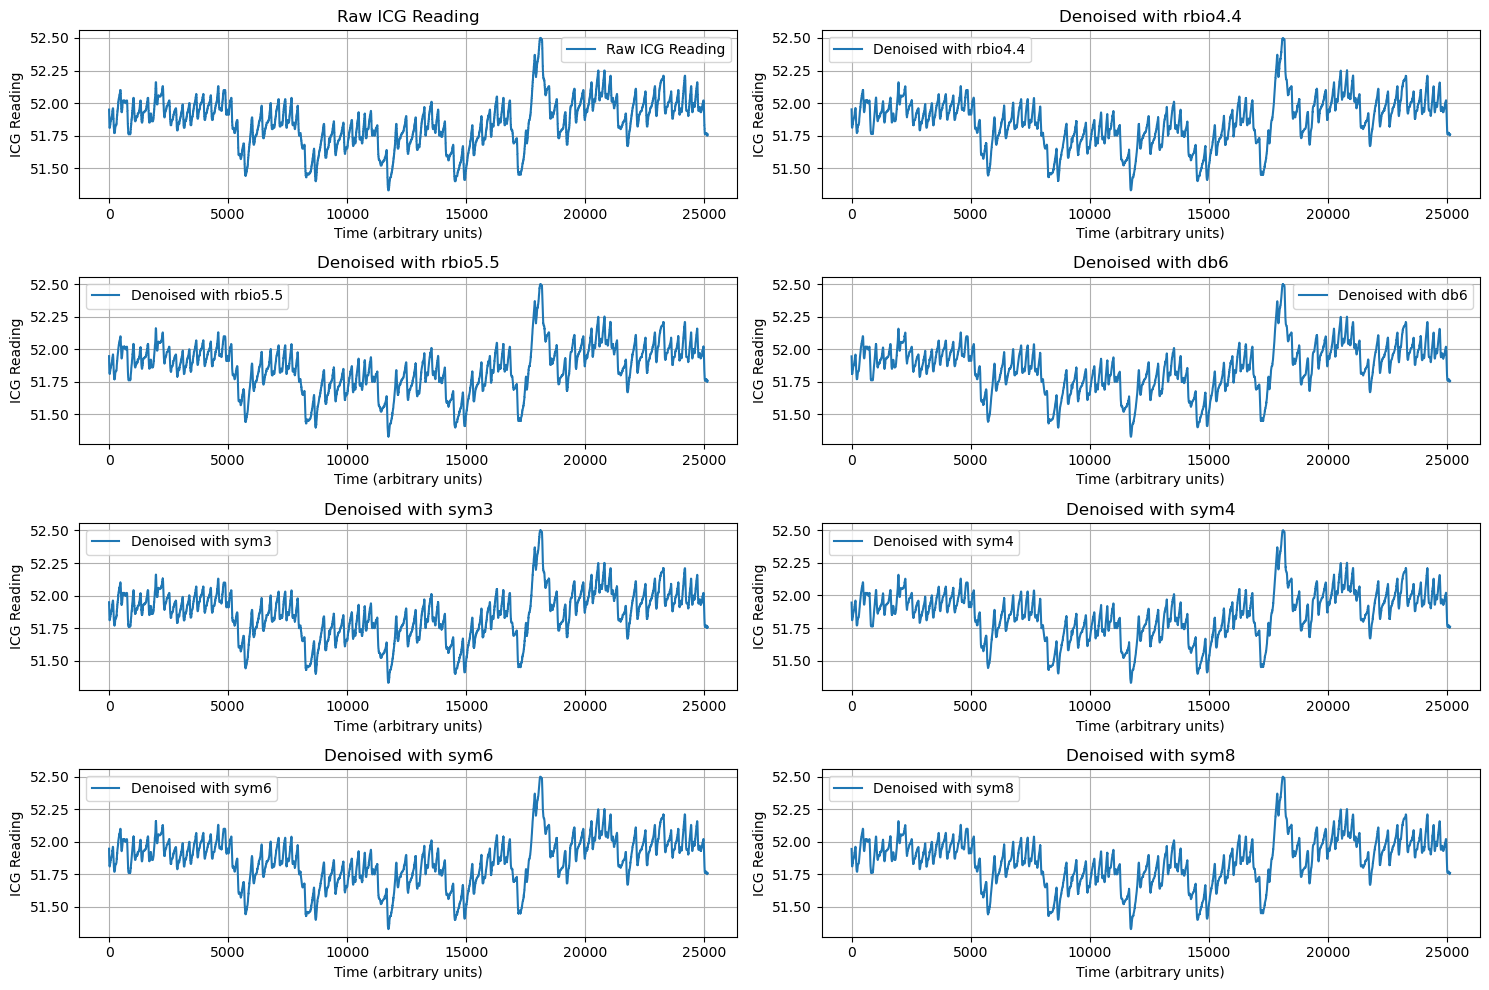

In [28]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pywt

# Load the JSON data
with open('ID001.json', 'r') as file:
    data = json.load(file)

# Extract the raw data
raw_data = np.array(data["raw_data"][100:])

# Define a function for DWT denoising
def dwt_denoise(data, wavelet, level=1):
    coeffs = pywt.wavedec(data, wavelet)
    # Calculate a universal threshold
    sigma = np.median(np.abs(coeffs[-level])) / 0.6745
    threshold = sigma * np.sqrt(2 * np.log(len(data)))
    # Apply soft thresholding
    new_coeffs = map(lambda x: pywt.threshold(x, threshold, mode='soft'), coeffs)
    # Reconstruct the signal from thresholded coefficients
    return pywt.waverec(list(new_coeffs), wavelet)

# List of wavelets to explore
wavelets = ['rbio4.4', 'rbio5.5', 'db6', 'sym3', 'sym4', 'sym6', 'sym8']

# Apply DWT denoising and plot results
plt.figure(figsize=(15, 10))

plt.subplot(4, 2, 1)
plt.plot(raw_data, label='Raw ICG Reading')
plt.title('Raw ICG Reading')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('ICG Reading')
plt.legend()
plt.grid(True)

for i, wavelet in enumerate(wavelets, 2):
    denoised_data = dwt_denoise(raw_data, wavelet)
    plt.subplot(4, 2, i)
    plt.plot(denoised_data, label=f'Denoised with {wavelet}')
    plt.title(f'Denoised with {wavelet}')
    plt.xlabel('Time (arbitrary units)')
    plt.ylabel('ICG Reading')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()
